<a href="https://colab.research.google.com/github/adnannasirsyed/ML_projects/blob/main/FoodHub_Adnan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
!pip install --upgrade numpy pandas matplotlib seaborn -q --user


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Installing for html conversion
!pip install nbconvert

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
#data = pd.read_csv('/content/Uber_Data (1).csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# making a copy of the data frame
df = data.copy()

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# The number of Rows and Columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 1898
Number of columns: 9


#### Observations:
The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# using info() function to get the Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* order_id: has integer values as expected
* customer_id: has integer values as expected
* restaurant_name: has string values as expected (categorical)
* cuisine_type: has string values as expected (categorical)
* cost_of_the_order: has float values as expected
* day_of_the_week: has string values as expected (categorical)
* rating: has string values which were not expected, it should be converted to float
* food_preparation_time: has integer values as expected
* delivery_time: has integer values as expected

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Missing values can be found using isnull() method
missing_values = df.isnull().sum()
missing_values


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
# rating feature has no null values, however it has non numerical values
# need to investigate further
df['rating'].head(10)

,rating
0,Not given
1,Not given
2,5
3,3
4,4
5,3
6,Not given
7,3
8,5
9,5


In [ ]:
# Top 10 rows shows that there are values as string "Not given", need to find if any other string exists
# use unique() method to find unique values in the rating feature
unique_ratings = df['rating'].unique()
unique_ratings

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# We found that there is only one type of string value used
# Find the number of time the value "Not given" appeared
not_given_count = (df['rating'] == 'Not given').sum()
not_given_count

736

In [ ]:
# We found 736 occasions when the rating was "Not given"
# Convert 'rating' to numeric, replacing 'Not given' with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
unique_ratings = df['rating'].unique()
unique_ratings

array([nan,  5.,  3.,  4.])

In [ ]:
# find how many values in the rating column are 5
mean_rating_count = (df['rating'] == 5).sum()
mean_rating_count

588

In [ ]:
# median, mode and average of rating feature
median_rating = df['rating'].median()
mode_rating = df['rating'].mode()[0]
average_rating = df['rating'].mean()
median_rating, mode_rating, average_rating

(5.0, 5.0, 4.344234079173838)

In [ ]:
# Since we cannot make any sensible analysis with 736 nan values, one way is to impute the missing values
# Since median and mode values are 5 which is extreme we can use the mean values to impute
# Fill missing ratings with the mean value
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['rating'].tail(5)

,rating
1893,5.000
1894,5.000
1895,4.344
1896,5.000
1897,4.344


In [ ]:
# find how many values in the rating column is set to rounded value of mean 5
mean_rating_count = (df['rating'] == 5).sum()
mean_rating_count

588

#### Observations:
The rating column had 736 missing values, which were replaced with the rounded mean rating of 5. Which is equal to median value.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# We can use the function describe() to determine the statistics of the features
df.describe()


,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000,1898.000,1898.000,1898.000,1898.000,1898.000
mean,1477495.500,171168.478,16.499,4.344,27.372,24.162
std,548.050,113698.140,7.484,0.580,4.632,4.973
min,1476547.000,1311.000,4.470,3.000,20.000,15.000
25%,1477021.250,77787.750,12.080,4.000,23.000,20.000
50%,1477495.500,128600.000,14.140,4.344,27.000,25.000
75%,1477969.750,270525.000,22.297,5.000,31.000,28.000
max,1478444.000,405334.000,35.410,5.000,35.000,33.000


In [ ]:
# Find minimum food preparation time
min_prep_time = df['food_preparation_time'].min()
min_prep_time

20

In [ ]:
# Find mean food preparation time
avg_prep_time = df['food_preparation_time'].mean()
avg_prep_time

27.371970495258168

In [ ]:
# Find maximum food preparation time
max_prep_time = df['food_preparation_time'].max()
max_prep_time

35

#### Observations:
* Minimum Prep time: 20 minutes
* Average Prep time: 27.37 minutes
* Maximum Prep time: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# We already know 736 orders had "Not given" status and we have already replaced
# those values with mean/median values of ratings
not_rated_count = (df['rating'] == 0.0).sum()
not_rated_count


0

#### Observations:
736 orders had no ratings originally. However, we filled those values with median/mean of the overall ratings

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

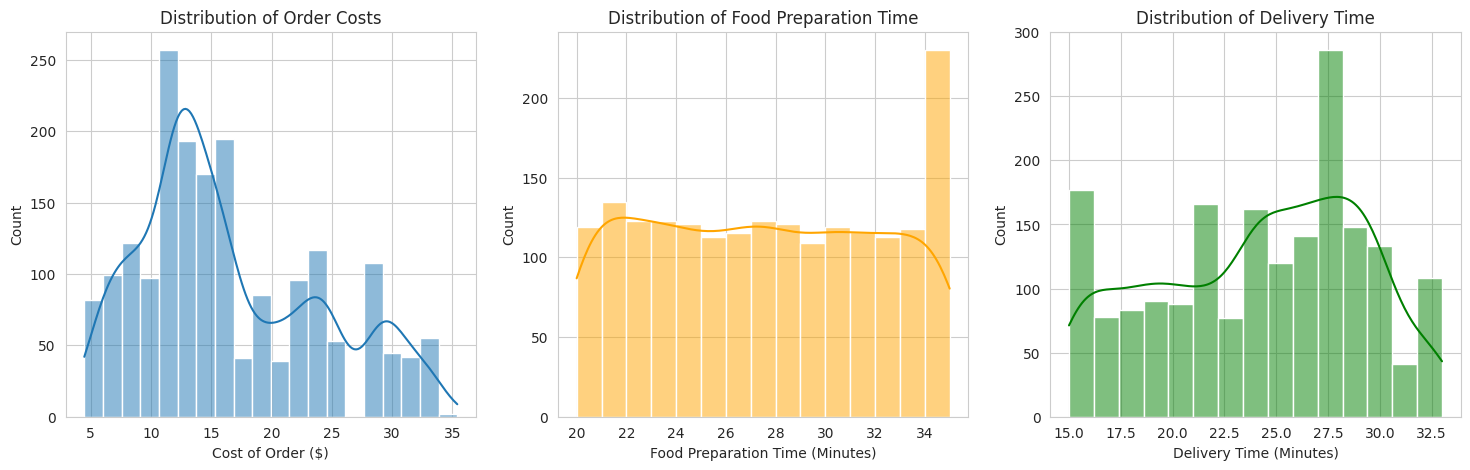

In [ ]:
# Write the code here
# Here we will analyse the variables/features individually

# 1. Histogram for numerical variables Order Cost, Food Prep Time and Delivery Time
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Analysing Cost of Orders with their frequency
sns.histplot(df['cost_of_the_order'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Order Costs")
axes[0].set_xlabel("Cost of Order ($)")

# Analysing Food Prep Time with their frequency
sns.histplot(df['food_preparation_time'], bins=15, kde=True, color='orange', ax=axes[1])
axes[1].set_title("Distribution of Food Preparation Time")
axes[1].set_xlabel("Food Preparation Time (Minutes)")

# Analysing Delivery Time with their frequency
sns.histplot(df['delivery_time'], bins=15, kde=True, color='green', ax=axes[2])
axes[2].set_title("Distribution of Delivery Time")
axes[2].set_xlabel("Delivery Time (Minutes)")

plt.show()


### Observations
* Cost of Order: Most orders cost between \$10-$25
* Food Prep Time: Most food preparation times fall between 20 and 35 minutes.
** The presence of a KDE curve shows a smooth trend of how preparation times are distributed.
* Delivery Time: Most of delivery times range 20-30 minutes

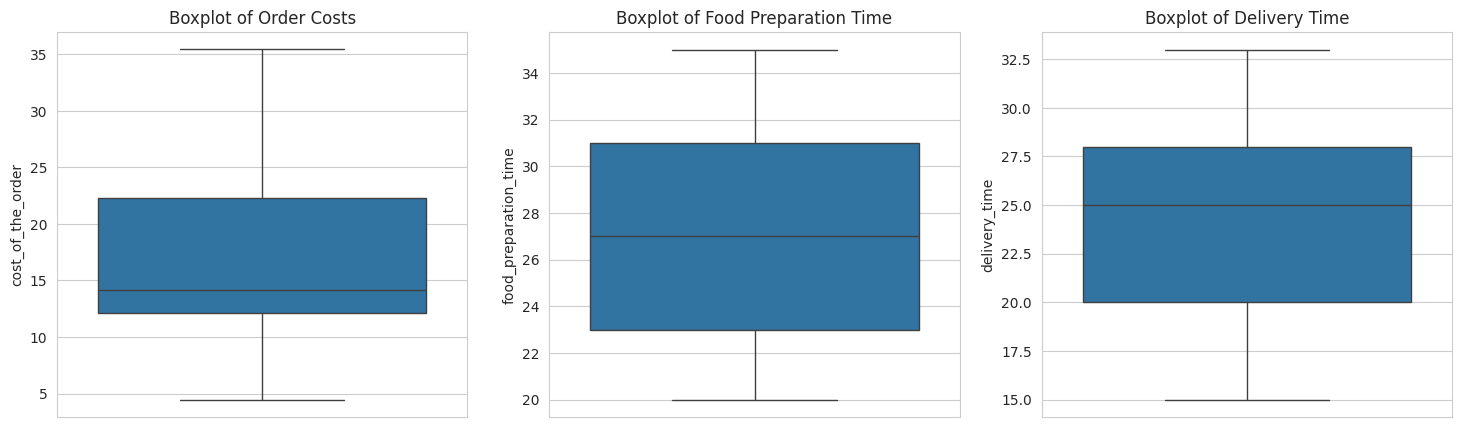

In [ ]:
# Secondly we are using Boxplots to understand the trend and find outliers
# 2. Boxplots for numerical variables

# Creating figure plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Analysing Cost of Orders with their frequency
sns.boxplot(y=df['cost_of_the_order'], ax=axes[0])
axes[0].set_title("Boxplot of Order Costs")

# Analysing Food Prep Time with their frequency
sns.boxplot(y=df['food_preparation_time'], ax=axes[1])
axes[1].set_title("Boxplot of Food Preparation Time")

# Analysing Delivery Time with their frequency
sns.boxplot(y=df['delivery_time'], ax=axes[2])
axes[2].set_title("Boxplot of Delivery Time")

plt.show()

### Observations
* Order costs have a wider spread, while preparation and delivery times are more concentrated.
* Not many outliers spotted

<ipython-input-88-26471f64a829>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day_of_the_week'], ax=axes[0], palette='coolwarm');
<ipython-input-88-26471f64a829>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rating'], ax=axes[1], palette='viridis');
<ipython-input-88-26471f64a829>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.index, y=top_cuisines.values, ax=axes[2], palette='Set2');
<ipython-input-88-26471f64a829>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.

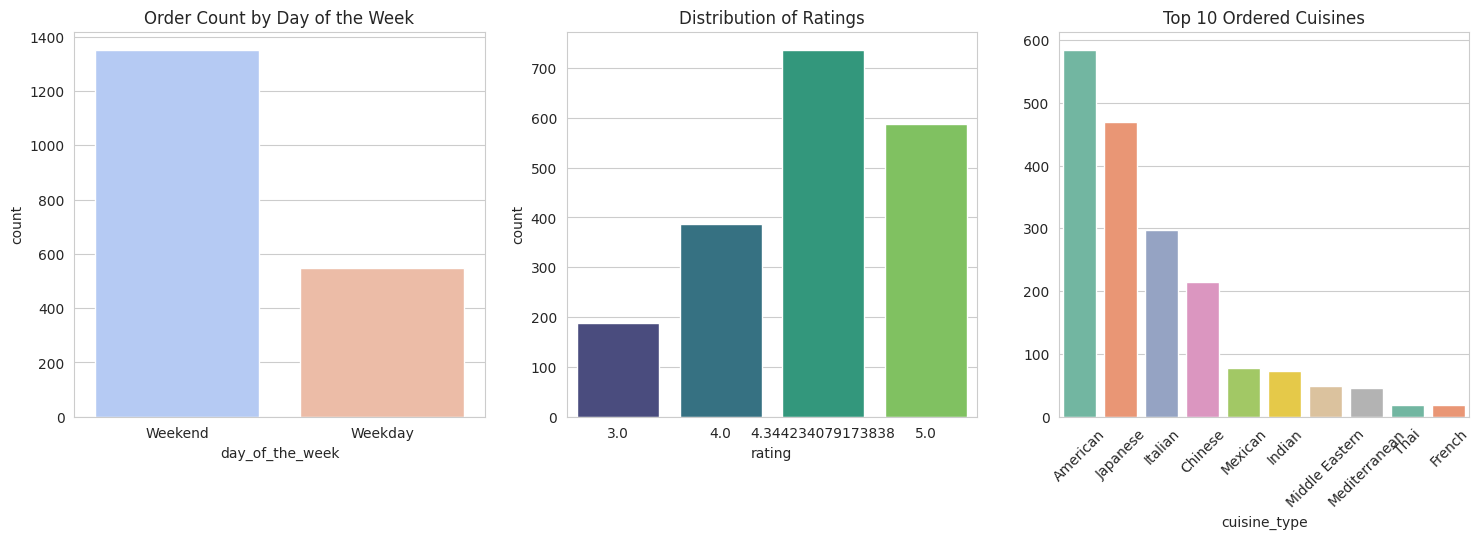

In [ ]:
# Now for Categorical variables we can use Countplot to find frequency
# 3. Countplots for categorical variables
# Creating figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Order Count by Day of the week
sns.countplot(x=df['day_of_the_week'], ax=axes[0], palette='coolwarm');
axes[0].set_title("Order Count by Day of the Week")

# Rating distribution
sns.countplot(x=df['rating'], ax=axes[1], palette='viridis');
axes[1].set_title("Distribution of Ratings")

# Top Ordered Cuisines
top_cuisines = df['cuisine_type'].value_counts().head(10)
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, ax=axes[2], palette='Set2');
axes[2].set_title("Top 10 Ordered Cuisines")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.show();

### Observations
* Order volume is higher on Weekends compared to Weekdays
* Most of the customers rated 4 or 5
* Top 10 Cuisine shows "American" is the most popular than Japanese and Italian  

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# top 5 restaurants in terms of the number of orders received
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
top_5_restaurants

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
* Customers most frequently ordered from Shake Shack with 219 orders.
* 132 orders were given to The Meatball Shop
* Blue Ribbon Sushi got 119 orders
* Blue Ribbon Fried Chicken received 96 orders and Parm received 68 orders.

* On a business point of view, more delivery drivers can be placed near or arround these top restaurant locations to cut the delivery times.
* These restaurants can be offered a partnership to get more customers and promotional deals to enhance the business.  

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Since Weekends were more popular for ordering we need to determine which cuisine is
# most popular or more frequently ordered
# Write the code here
# Creating a data frame containing only Weekend data
weekend_orders = df[df['day_of_the_week'] == "Weekend"]
# Arranging the newly created dataframe with respect to max number ordered cuisine type
most_popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().idxmax()
most_popular_cuisine_weekend

'American'

#### Observations:
The most frequently ordered cuisine type on weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# To find percentage of orders costing more than $20, find all orders that cost
# more than 20 and divide by the number of total orders
percentage_high_cost_orders = (df[df['cost_of_the_order'] > 20].shape[0] / num_rows) * 100
percentage_high_cost_orders

29.24130663856691

#### Observations:
29.3% of the orders exceed $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Determining average delivery time using mean() method
mean_delivery_time = df['delivery_time'].mean()
mean_delivery_time

24.161749209694417

#### Observations:
The average delivery time is 24.2 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Finding the top 3 customers IDs with highest number of orders placed
# Also the number of orders they placed
top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The top 3 most frequent customers are:
1. 52832 with 13 orders
2. 47440 with 10 orders
3. 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


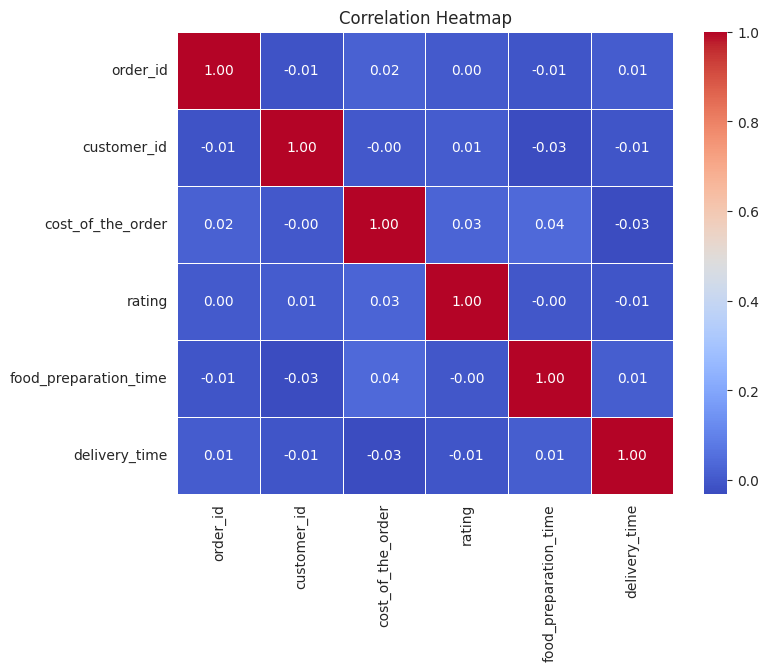

In [ ]:
# We now perform multivariate analysis to determine the effects of each variable
# compared to another variable, we can do correlation mapping, scatter plots, boxplots
# Violin plots, and Pairplots to determine the relationships and find insights

# First Correlation Map
# Creating figure
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['number']).corr()  # Select only numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Observations
* Weak correlations between numerical variables.
* Food preparation time and delivery time have a weak positive correlation.
* Order cost does not significantly affect delivery time or ratings.

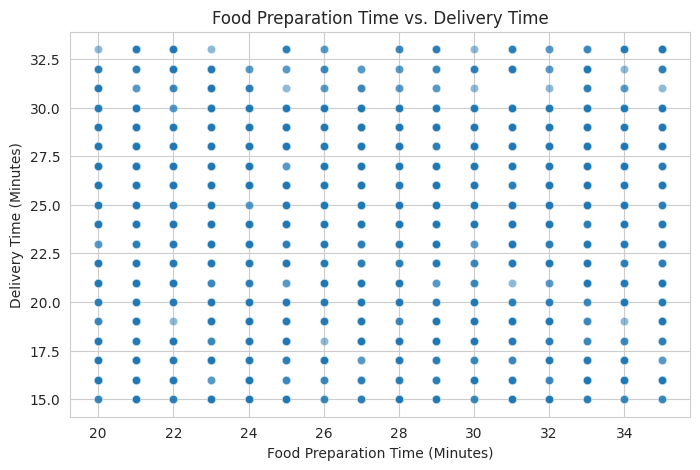

In [ ]:
# Now we analyse using scatter plot to see the trends
# Scatter plot: Food Preparation Time vs Delivery Time
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['food_preparation_time'], y=df['delivery_time'], alpha=0.5)
plt.xlabel("Food Preparation Time (Minutes)")
plt.ylabel("Delivery Time (Minutes)")
plt.title("Food Preparation Time vs. Delivery Time")
plt.show()

### Observations
* Their is no strong correlation between these variables, longer preparation time does not necessarily lead to longer delivery time.
* Some orders with short prep times still have long delivery times, likely due to distance or traffic delays.

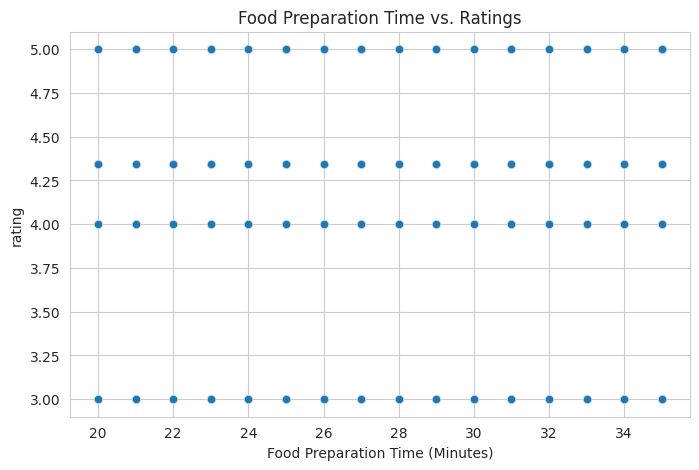

In [ ]:
# Scatter plot: Food Preparation Time vs Ratings
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['food_preparation_time'], y=df['rating'], alpha=0.5)
plt.xlabel("Food Preparation Time (Minutes)")
plt.ylabel("rating")
plt.title("Food Preparation Time vs. Ratings")
plt.show()

### Observations
* There is no correllation, the points appear scattered with no clear trend, suggesting that food preparation time does not significantly impact ratings.
* Customers seem to give high ratings (4-5) regardless of preparation time.
* This suggests that customers may value food quality over speed.
* This indicates that other factors (e.g., food quality, delivery experience) may influence customer satisfaction more than prep time.
* A few orders with very high prep times (above 30 minutes) still have high ratings. This could suggest certain cuisines or restaurants take longer but maintain quality.

<ipython-input-97-1e445a168024>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['day_of_the_week'], y=df['cost_of_the_order'], palette='Set2')


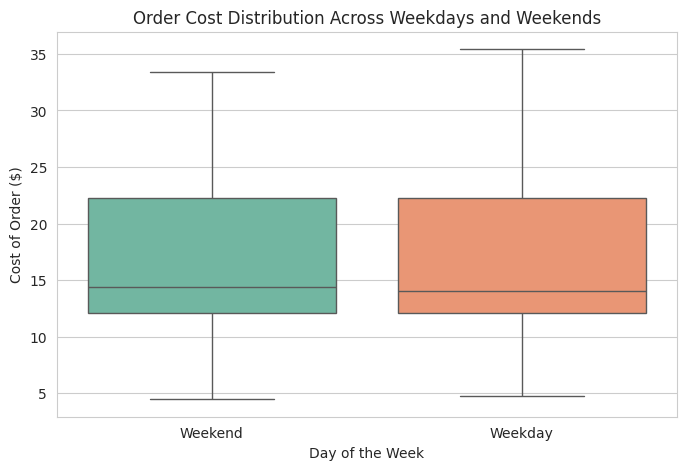

In [ ]:
# Now we will analyse Cost of the order with Days of the Week
# This will give insight on which days customer prefered to pay more
# Boxplot: Cost of Order vs Day of the Week
plt.figure(figsize=(8,5))
sns.boxplot(x=df['day_of_the_week'], y=df['cost_of_the_order'], palette='Set2')
plt.xlabel("Day of the Week")
plt.ylabel("Cost of Order ($)")
plt.title("Order Cost Distribution Across Weekdays and Weekends")
plt.show()

### Observations
* Mean value of Weekend orders is slightly more than the Weekday's values, indicating Weekend orders tend to be slightly more expensive.

<ipython-input-98-d225b7402453>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['rating'], y=df['cost_of_the_order'], palette='coolwarm')


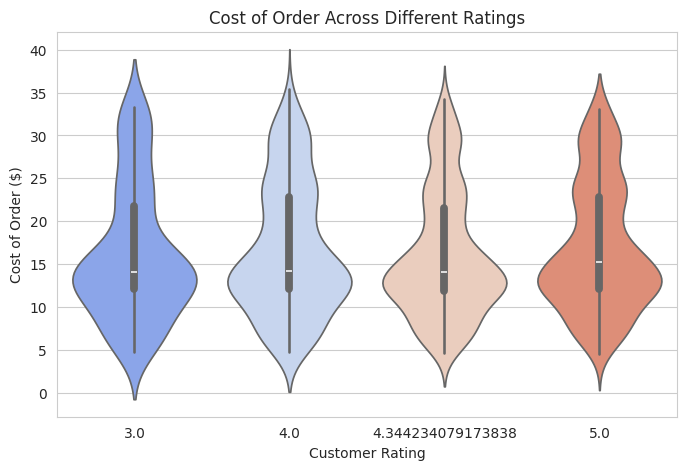

In [ ]:
# We will now analyse Violin plot for Ratings vs cost of order
# This will show the variations of cost with respect to the ratings
# Violin Plot: Rating vs Cost of Order
plt.figure(figsize=(8,5))
sns.violinplot(x=df['rating'], y=df['cost_of_the_order'], palette='coolwarm')
plt.xlabel("Customer Rating")
plt.ylabel("Cost of Order ($)")
plt.title("Cost of Order Across Different Ratings")
plt.show()

### Observations
* Orders with lower ratings tend to have more variation in cost.
* Orders rated 5 have a more consistent price range.
* It is also evaluated that high-cost orders didn't always receive the highest ratings.

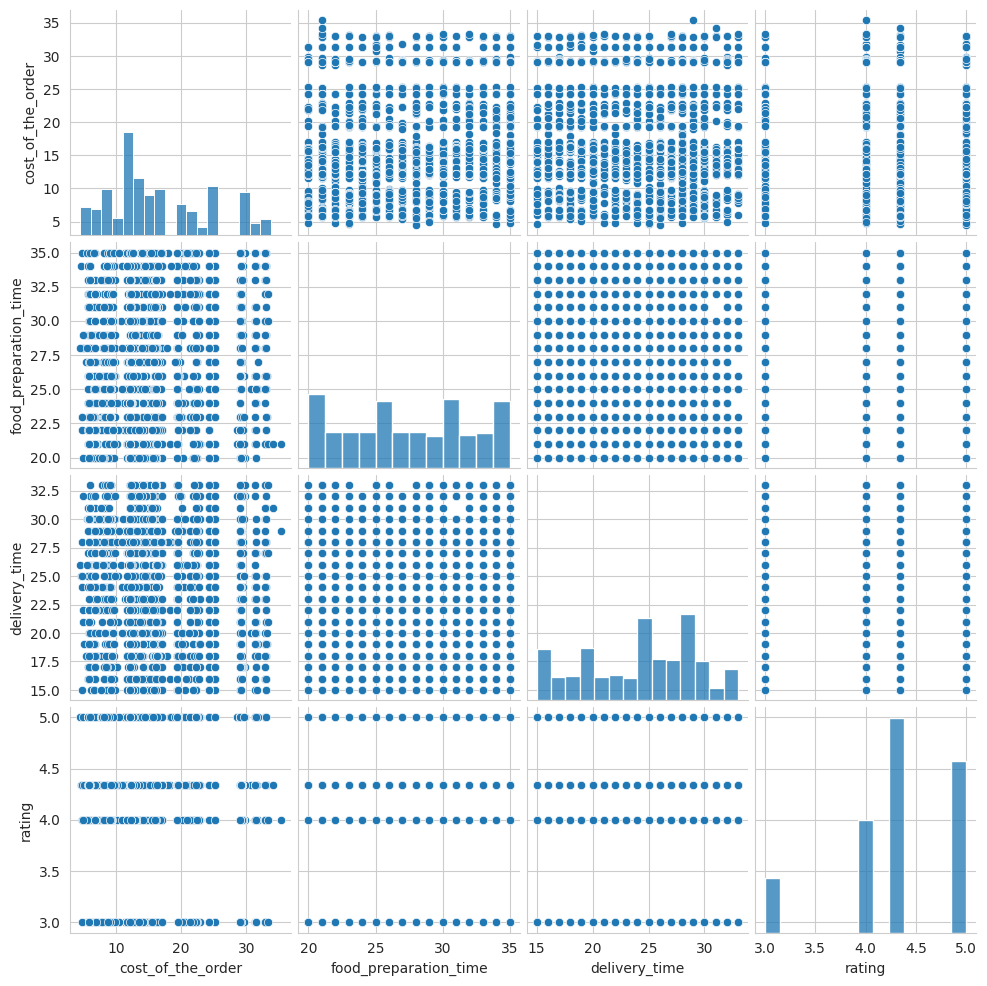

In [ ]:
# Another way to determine correlations between variables is a pairplot
# Pairplot: Relationships Among Numerical Variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']])
plt.show()

### Observations
* Again the plots doesn't show any strong correlations between each other.
* Food preparation time and delivery time have a weak positive correlation.
* Order cost does not significantly affect delivery time or ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Restaurants that have rating count of more than 50 and the average rating greater than 4
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
eligible_restaurants

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,96,4.333
Blue Ribbon Sushi,119,4.268
Parm,68,4.220
RedFarm Broadway,59,4.275
RedFarm Hudson,55,4.241
Shake Shack,219,4.304
The Meatball Shop,132,4.451


#### Observations:
* The following are the restaurants that fits the search of having more than 50 ratings of 4 and above:
** Blue Ribbon Fried Chicken
** Blue Ribbon Sushi	- has 119 ratings of average 4.5
** Parm
** RedFarm Broadway
** RedFarm Hudson
** Shake Shack - has 219 ratings of average 4.6
** The Meatball Shop - has 132 ratings of average 4.7

* Business can focus on the top three most frequently top rated restaurants to initiate deals and discounts to further their revenues.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# The net revenue generated by the company across all orders, with 25% on orders > $20
# 15% on orders > $5
# defining the function
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25  # 25% revenue
    elif cost > 5:
        return cost * 0.15  # 15% revenue
    return 0
# applying the function created above
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue'].sum()
total_revenue

6166.303

#### Observations:
* The company generates a total revenue of $6166 from commissions.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculating percentage of Orders Taking More than 60 Minutes
# Creating a new feature 'total delivery time'
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
# percentage of times > 60 minutes
percentage_orders_above_60 = (df[df['total_delivery_time'] > 60].shape[0] / num_rows) * 100
percentage_orders_above_60

10.537407797681771

#### Observations:
* 10.5% of orders take longer than 60 minutes in total (prep time + delivery time).


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculating average Delivery Times; Weekday vs Weekend
mean_delivery_time_weekday = df[df['day_of_the_week'] == "Weekday"]['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week'] == "Weekend"]['delivery_time'].mean()
mean_delivery_time_weekday, mean_delivery_time_weekend

(28.340036563071298, 22.4700222057735)

### Observations:
* The average delivery time on Weekdays is 28.3 minutes
* The average delivery time on Weekends is 22.5 minutes
* This shows possibily due to less traffic congestion the delivery times were shortened on Weekends  

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# Conclusions:
### Customer Ordering Behavior

* The average order cost is \$16.50, with most orders ranging between \$10-\$25.

* Order volume is slightly higher on weekends, indicating peak demand.

* Customers tend to give high ratings (4 & 5), but 736 orders had no ratings.

* No strong correlation between order cost and rating, suggesting that pricing does not significantly impact customer satisfaction.

### Food Preparation & Delivery Insights

* The average food preparation time is 27.4 minutes, ranging from 20 to 35 minutes.

* The average delivery time is 24.2 minutes, with most deliveries between 20-30 minutes.

* There is no direct correlation between food preparation time and delivery time, indicating external factors like traffic, location, or order volume may affect delivery delays.

### Restaurant & Cuisine Demand Analysis

* Certain restaurants dominate the order volume, suggesting these should be prioritized for promotions and logistical optimizations.

* Top cuisines ordered indicate customer preferences, helping FoodHub to optimize partnerships and recommendations.

# Recommendations:

*  Optimize Delivery Efficiency: Identify frequent delays and improve logistics.
*  Encourage Ratings: Offer incentives for customers to leave feedback.
*  Expand Restaurant Partnerships: Target the most popular cuisine types.
*  Weekend Surge Planning: More delivery drivers should be available.
*  Higher Commission Deals: Partner with high-demand restaurants for better deals.
* Investigate factors beyond cost affecting ratings, such as order accuracy, packaging, and delivery experience.

### Optimize Delivery Efficiency

* Identify frequent delivery delays and partner with restaurants to reduce food preparation bottlenecks.

* Implement priority delivery zones based on high-demand areas.

### Enhance Customer Experience

* Encourage customers to leave ratings by offering incentives, as 736 orders lacked ratings.

* Use data-driven insights to suggest personalized restaurant recommendations.

### Expand Strategic Partnerships

* Focus on top-performing restaurants for better commission deals and promotional campaigns.

* Introduce new restaurant partnerships based on popular cuisine demand trends.

### Weekend Surge Planning

* Since weekends see higher order costs, FoodHub should optimize delivery fleet availability.

* Offer weekend promotions to boost customer retention and engagement.

By implementing these strategies, FoodHub can improve its operational efficiency, customer satisfaction, and revenue generation.

### Investigate other factors

* It may be helpful to determine what cuisine is more favorable due to factors like 'order accuracy', the quality of 'packaging', and the 'delivery experience'.

---

### Converting to HTML

In [ ]:
!jupyter nbconvert FoodHub_Full_Code_Adnan.ipynb --to html

[NbConvertApp] Converting notebook FoodHub_Full_Code_Adnan.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 1174413 bytes to FoodHub_Full_Code_Adnan.html
